In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/wine_data.csv", header = None, usecols = [0, 1, 2])
df.columns = ['class label','Alcohol','Malic acid']
df

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

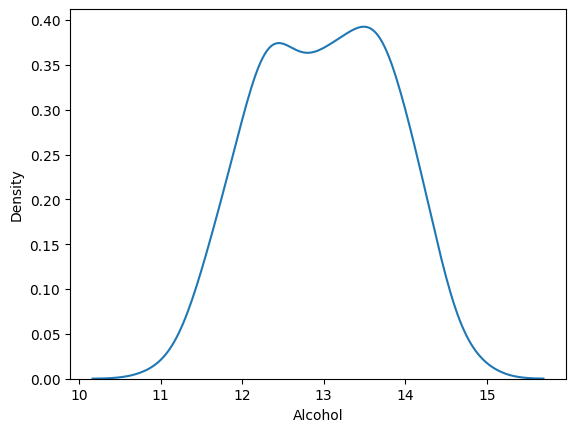

In [7]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

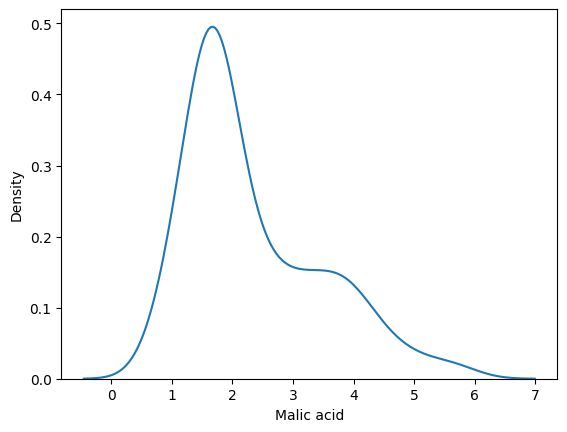

In [8]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

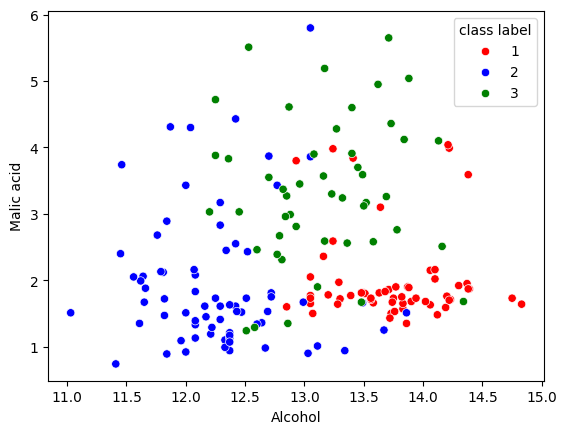

In [10]:
color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='class label', data=df, palette=color_dict)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df[['Alcohol','Malic acid']],df['class label'],test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(142, 2) (36, 2)
(142,) (36,)


In [15]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Alcohol', 'Malic acid'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Alcohol', 'Malic acid'])

X_train_scaled

,Alcohol,Malic acid
0,0.871053,0.160896
1,0.394737,0.940937
2,0.352632,0.036660
3,0.644737,0.158859
4,0.536842,0.124236
...,...,...
137,0.744737,0.126273
138,0.321053,0.171079
139,0.881579,0.199593
140,0.436842,0.130346


In [18]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.1
max,14.8,5.8


In [17]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

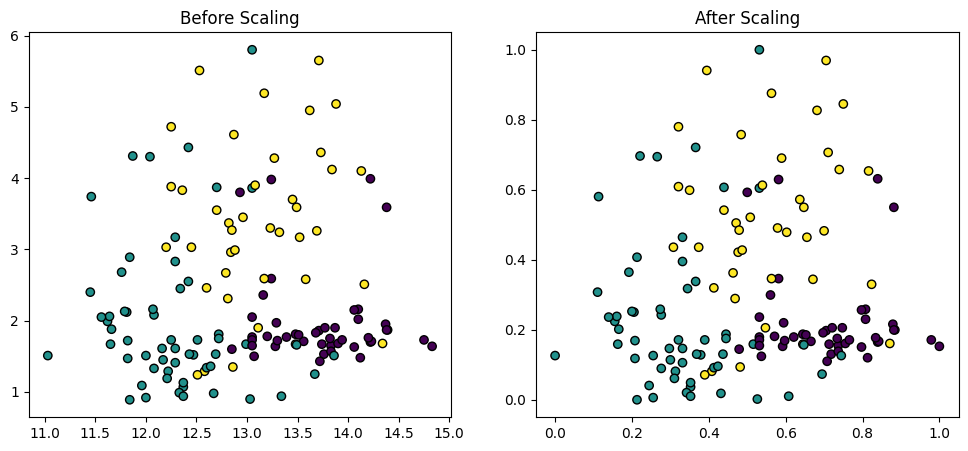

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train, cmap='viridis', edgecolor='k')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train, cmap='viridis', edgecolor='k')
ax2.set_title('After Scaling')

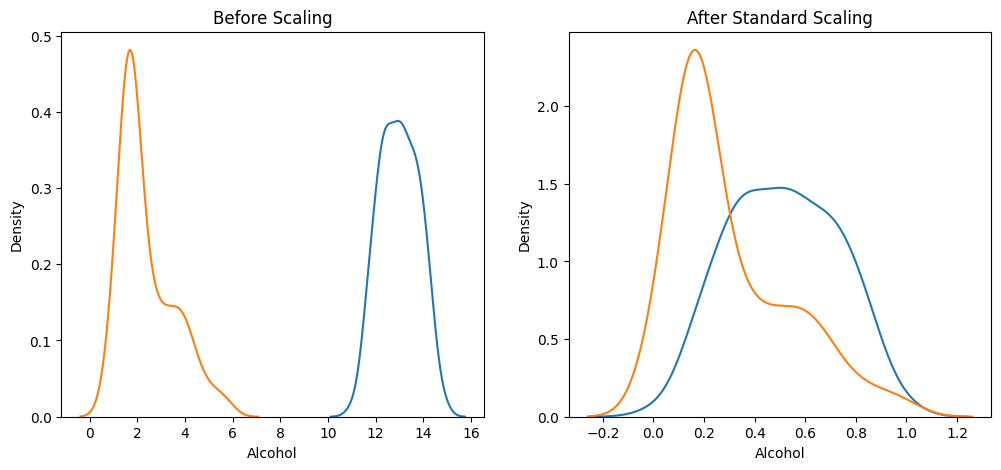

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

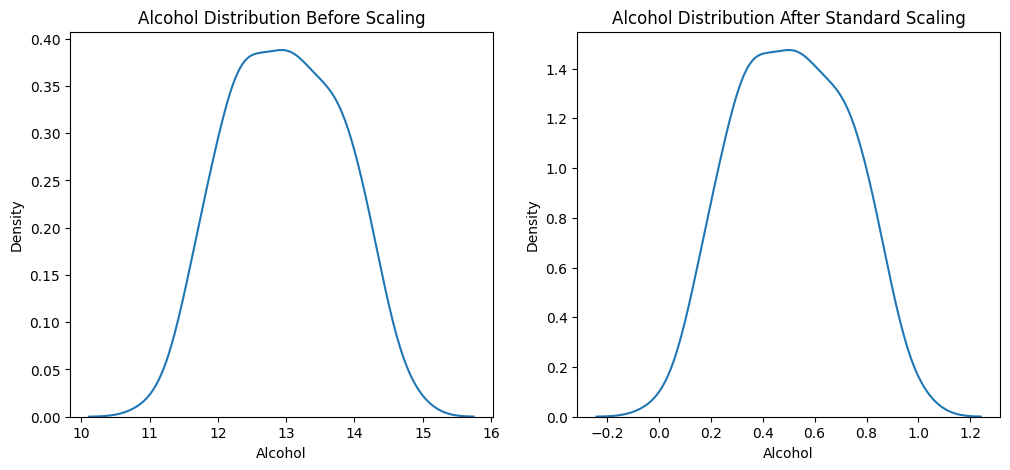

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

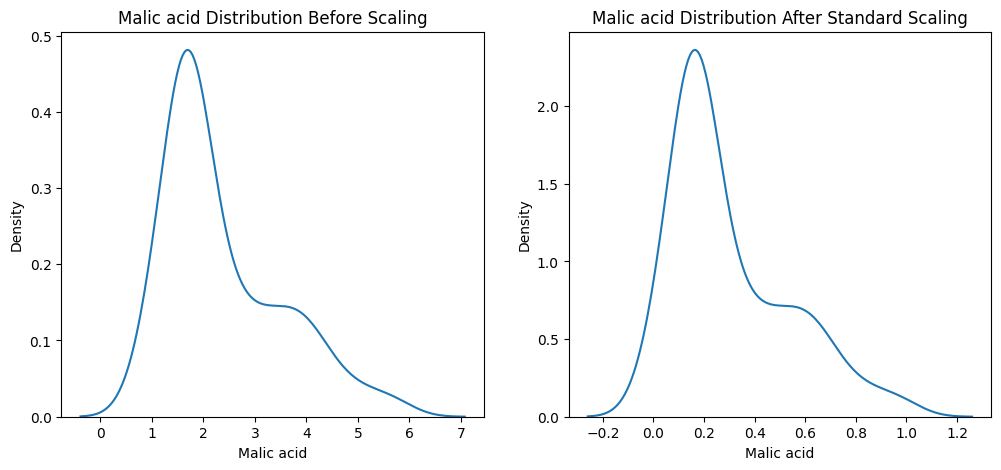

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()